<a href="https://colab.research.google.com/github/nadiya-k-a/Students-Performance-Analysis/blob/main/Case_study_on_Regression_Nadiya.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Case Study On Regression***

### Importing necessary libraies

In [34]:
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression,Lasso
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

In [35]:
##Loading the dataset onto the Python platform

data = pd.read_csv('/content/car_age_price.csv')

In [36]:
data

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000
...,...,...
107,2016,375000
108,2014,300000
109,2015,425000
110,2016,420000


In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Year    112 non-null    int64
 1   Price   112 non-null    int64
dtypes: int64(2)
memory usage: 1.9 KB


# **Correlation between Year and Price**

<Axes: >

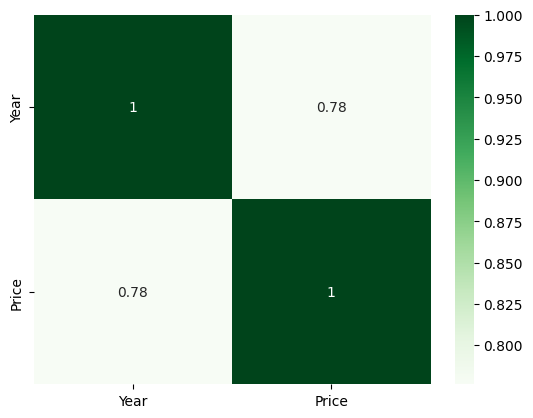

In [38]:
corr_matrix = data.corr()

##plotting correlation matrix using heat map

sns.heatmap(corr_matrix,annot=True,cmap="Greens")


# **Creating the best model for linear relationship between year and price**

In [57]:
## split data into features (x) and target variable (y)

x = data[['Year']]
y = data['Price']

In [59]:
## splitting the data into training and testing sets

x_train, x_test, y_train , y_test = train_test_split(x,y, test_size=0.2,random_state=42)

In [60]:
## Create and train Linear Regression model
linear_model = LinearRegression()
model = linear_model.fit(x_train, y_train)


##Make predictions using the Linear Regresson model
predictions=linear_model.predict(x_test)

In [61]:
predictions

array([600775.91252081, 505558.77690466, 553167.34471273, 553167.34471273,
       553167.34471273, 410341.6412885 , 505558.77690466, 553167.34471273,
       600775.91252081, 600775.91252081, 315124.50567235, 505558.77690466,
       410341.6412885 , 648384.48032889, 553167.34471273, 600775.91252081,
       315124.50567235, 410341.6412885 , 505558.77690466, 505558.77690466,
       505558.77690466, 505558.77690466, 505558.77690466])

In [62]:
##Checking mean squared error and r squared error for linear regression

print("Mean Squared Error is : ", mean_squared_error(y_test,predictions))
print(" R squared value is   : ",r2_score(y_test,predictions))

Mean Squared Error is :  4326906256.829671
 R squared value is   :  0.36759313425902185


## **Predicting the possible price of a 2022 model second-hand grand i10**



In [87]:
# list the year you want to predict
year = [2022]

year = pd.DataFrame(year, columns=['Year'])

# make a prediction
prediction_2022 = model.predict(year)
prediction_2022

array([743601.61594504])

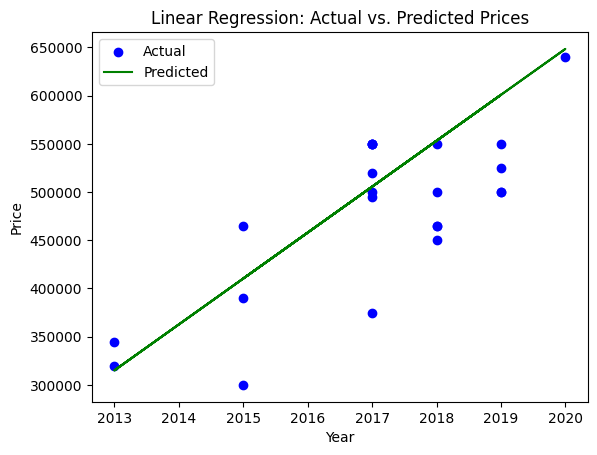

In [46]:
# Scatter plot for Linear Regression

plt.scatter (x_test, y_test,color='blue',label= 'Actual')
plt.plot(x_test, predictions, color='green',label='Predicted')
plt.xlabel ('Year')
plt.ylabel('Price')
plt.title('Linear Regression: Actual vs. Predicted Prices')
plt.legend ()
plt.show ()

# **LASSO REGRESSION MODEL**

In [72]:
## split data into features (x) and target variable (y)

x = data[['Year']]
y = data['Price']

In [73]:
x_train, x_test, y_train , y_test = train_test_split(x,y, test_size=0.2,random_state=42)


In [88]:
##Create and train Lasso Regerssion Model
lasso_model = Lasso(alpha = 0)
lasso_model.fit(x_train,y_train)

##Make predictions using Lasso model
lasso_predictions = lasso_model.predict(x_test)

<ipython-input-88-cc57c52c0f4e>:3: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  lasso_model.fit(x_train,y_train)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.383e+11, tolerance: 7.659e+07 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


In [89]:
##Checking mean squared error and r squared error for Lasso model

print("Mean Squared Error is : ", mean_squared_error(y_test,lasso_predictions))
print(" R squared value is   : ",r2_score(y_test,lasso_predictions))

Mean Squared Error is :  4326906256.829671
 R squared value is   :  0.36759313425902185


# **From above we can see if alpha is set to be 0,   Lasso Regression equals Linear Regression.**


In [90]:
##Create and train Lasso Regerssion Model
lasso_model = Lasso(alpha = 1)
lasso_model.fit(x_train,y_train)

##Make predictions using Lasso model
lasso_predictions = lasso_model.predict(x_test)
print("Mean Squared Error is : ", mean_squared_error(y_test,lasso_predictions))
print(" R squared value is   : ",r2_score(y_test,lasso_predictions))



Mean Squared Error is :  4326859771.015669
 R squared value is   :  0.3675999284778446


In [84]:
##Predicting price of i10 in the year using Lasso Regression model
lasso_model.predict([[2022]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(


array([743599.37427144])

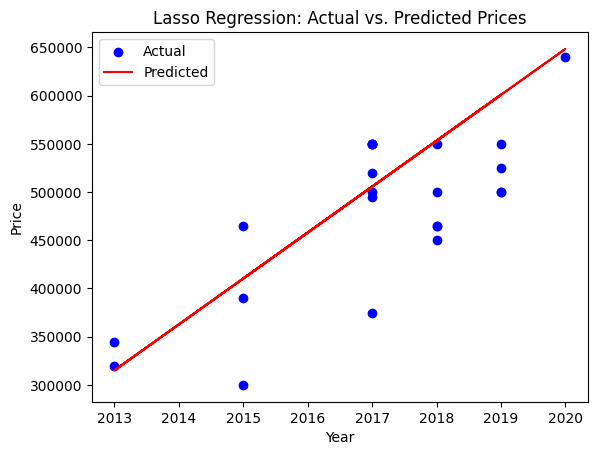

In [86]:
# Scatter plot for Lasso Regression
plt.scatter(x_test, y_test,color='blue',label='Actual')
plt.plot(x_test, lasso_predictions,color='red',label='Predicted')
plt.xlabel('Year')
plt.ylabel ('Price')
plt.title('Lasso Regression: Actual vs. Predicted Prices')
plt.legend ()
plt.show ()


# Lasso Regression is also another linear model derived from Linear Regression which shares the same hypothetical function for prediction. 

# From the above steps we can conclude that lasso regression is SLIGHTLY better than linear regression for this dataset# 